In [62]:
import visa
import numpy as np
import pandas as pd
import tqdm
import time

In [63]:
vi = visa.ResourceManager()
vna = vi.open_resource('TCPIP0::10.20.61.161::inst0::INSTR')

In [64]:
S21_complex = {}
T='500mK_040919_res#2'
sample = {'name':'Bolometer',
          'f_min':4.1484e9,
          'f_max':4.1584e9,
          'bw': 100,
          'nop': 2001,
          'averages':4}

In [65]:
powers=np.arange(-10,2.5,2.5)
vna.write('INIT:CONT 0;')
vna.query('*OPC?')

vna.write('SENS:FREQ:STAR {};'.format(sample['f_min']))
vna.write('SENS:FREQ:STOP {};'.format(sample['f_max']))
vna.write('SENS:SWE:POIN {};'.format (sample['nop']))
vna.write('SENS:BAND {};'.format(sample['bw']))
vna.write('SENS:AVER:STAT ON')
vna.write('SENS:AVER:COUN {}'.format(sample['averages']))
vna.write('FORMAT REAL,32; FORMat:BORDer SWAP;')
f = np.linspace(sample['f_min'], sample['f_max'], sample['nop'])
sweep_time=float(vna.query('SENS:SWE:TIME?'))
vna.timeout = (sweep_time+1)*1000 # in milliseconds
print(sweep_time)

21.0905


In [66]:
for power in tqdm.tqdm(powers):
    time.sleep(10)
    vna.write('SOUR:POW {};'.format(power))
    for i in range(sample['averages']):
        vna.write('INIT:IMM;')
        vna.query('*OPC?')
    result = np.asarray(vna.query_binary_values('CALC:DATA? SDATA', datatype=u'f'))
    S21_complex[power] = (result[::2]+1j*result[1::2])
vna.write('INIT:CONT 1;')








  0%|                                                                                            | 0/5 [00:00<?, ?it/s]






 20%|████████████████▊                                                                   | 1/5 [01:25<05:42, 85.59s/it]






 40%|█████████████████████████████████▌                                                  | 2/5 [02:51<04:16, 85.61s/it]






 60%|██████████████████████████████████████████████████▍                                 | 3/5 [04:16<02:51, 85.62s/it]






 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [05:42<01:25, 85.63s/it]






100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:08<00:00, 85.64s/it]








(14, <StatusCode.success: 0>)

In [67]:
#запись в файл
S21_complex = pd.DataFrame(S21_complex, index=f)
S21_dB = np.log10(np.abs(S21_complex))*20
S21_phase = pd.DataFrame(np.unwrap(np.angle(S21_complex)), index=f)
S21_complex.to_csv(r'C:\Users\cryopxi\Documents\Alexey\T{}-complex.csv'.format(T))
S21_dB.to_csv(r'C:\Users\cryopxi\Documents\Alexey\T{}-dB.csv'.format(T))
S21_phase.to_csv(r'C:\Users\cryopxi\Documents\Alexey\T{}-phase.csv'.format(T))

In [35]:
vna.write('SENS:AVER:MODE SWE')

(20, <StatusCode.success: 0>)

In [10]:
vna.write('SENS:AVER:STAT ON')
vna.write('SENS:AVER:COUN {}'.format(sample['averages']))

(19, <StatusCode.success: 0>)

In [14]:
vna.write('SENS:AVER:COUN {}'.format(sample['averages']))

(18, <StatusCode.success: 0>)

In [7]:
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
gr=pd.read_csv('C:/Users/cryopxi/Documents/Alexey/T24mK_040919_res#1-dB.csv',header=0, sep=',')

In [61]:
gr.head(5)

,Unnamed: 0,-40.0,-37.5,-35.0,-32.5
0,1.480600e+09,-30.178331,-30.178002,-30.172563,-30.175381
1,1.480600e+09,-30.210178,-30.182538,-30.176621,-30.180605
2,1.480600e+09,-30.197321,-30.181660,-30.186808,-30.174054
3,1.480600e+09,-30.172105,-30.167772,-30.172188,-30.181042
4,1.480600e+09,-30.204848,-30.193540,-30.180763,-30.180008


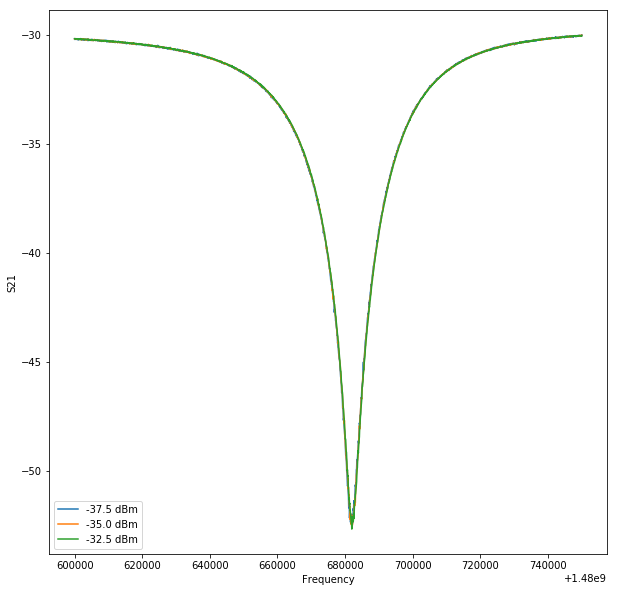

In [63]:
f=gr.iloc[0:,0:1]
#print(f)
plt.figure(figsize=(10,10))
for i in range (1,4,1):
    power=list(gr.columns.values)
    S21=gr.iloc[0:,i:i+1]
    plt.plot(f,S21,label=power[i+1]+ ' dBm')
    plt.legend(fontsize=10)
    plt.xlabel('Frequency')
    plt.ylabel('S21')

In [54]:
vna.write('INIT:CONT 1;')

(14, <StatusCode.success: 0>)

In [15]:
vna.write('INIT:CONT 1;')

(14, <StatusCode.success: 0>)

In [47]:
print(result)

[ 0.00959594 -0.00781356  0.00960395 ...  0.00205438  0.01176183
  0.00205426]
